In [2]:
import numpy as np

In [2]:
a = np.array([[1,2,3],[4,5,6],[7,8,9]])

In [6]:
b = np.insert(a, 3, 1, axis=1)
b

array([[1, 2, 3, 1],
       [4, 5, 6, 1],
       [7, 8, 9, 1]])

In [3]:
a = np.array([1, 2, 3])
b = np.array([2, 4, 6])
b / a

array([2., 2., 2.])

In [4]:
6 / a

array([6., 3., 2.])

100
74
72
73
71
73
74
74
76
76
----------------------------------------
acc:  93.0 %


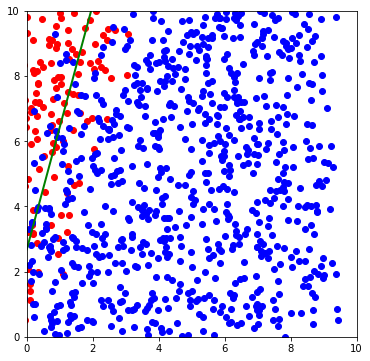

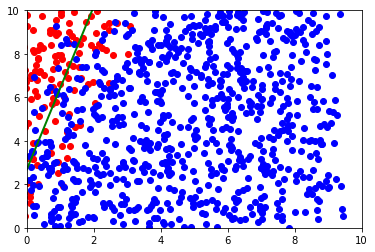

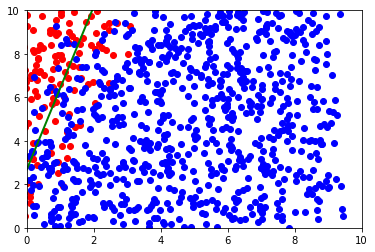

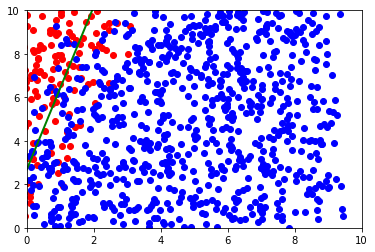

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## 数据生成
## 分离超平面
## y = 3x-2


# 网络输入
# N：坐标个数
# D_in：输入位数
# D_out: 输出维度

N, D_in, D_out = 1000, 3, 1

## 随机生成数据
np.random.seed(6)
x = 10 * np.random.rand(N+200, D_in-1)

## 添加一列1，将b并入矩阵
x = np.insert(x, D_in-1, 1, axis=1)

# 将正负分开，方便绘图
y = []
for i in range(1200):
    if x[i][1] > (3*x[i][0]-2):
        y.append(1)
    else:
        y.append(-1)

## 加入噪声
zz = 3
for i in range(1200):
    lam = zz * np.random.rand() - zz
    x[i][0] += lam

y = np.array(y)

## 1000训练，200测试
x_train = x[:N]
y_train = y[:N]

x_test = x[N:]
y_test = y[N:]

lr = 0.0001
w = np.random.randn(D_in, D_out)

## 动态绘图列表
w_draw = []

for epoch in range(1000):
    y_ = np.sign(np.matmul(x_train, w))
    for i in range(N):
        if y_[i][0] != y_train[i]:
            w += lr * y_train[i] * np.array([x_train[i]]).T
    
    loss = np.sum(y_train!=y_.flatten())
    if epoch % 100 == 0:
        print(loss)
        w_draw.append(w)
        

test = np.sign(np.matmul(x_test, w))
acc = np.sum(test.flatten()==y_test) / len(test)
print("----------------------------------------")
print("acc: ", acc*100, "%")


## 绘图
## 训练集点分类
x1 = []
x2 = []
for i in range(1000):
    if y[i] == 1:
        x1.append(x[i])
    else:
        x2.append(x[i])
x1 = np.array(x1)
x2 = np.array(x2)

## 测试集点分类
r1 = []
r2 = []
for i in range(200):
    if y_test[i] == 1:
        r1.append(x_test[i])
    else:
        r2.append(x_test[i])
r1 = np.array(r1)
r2 = np.array(r2)

## 绘图
plt.figure(figsize=(13, 6))
plt.ion()
xx = np.linspace(0, 10, 100)

plt.subplot(1, 2, 1)
for wd in w_draw:
    plt.cla()
    plt.axis([0, 10, 0, 10])
    yy = -(wd[0]*xx+wd[2])/wd[1]
    ## 训练集绘制
    plt.scatter(x1[:,0], x1[:,1], c='red')
    plt.scatter(x2[:,0], x2[:,1], c='blue')
    plt.plot(xx, yy.flatten(), 'g-', lw=2)
    plt.pause(0.1)

## 测试集绘制
yy = -(w[0]*xx+w[2])/w[1]
plt.subplot(1, 2, 2)
plt.axis([0, 10, 0, 10])
plt.scatter(r1[:,0], r1[:,1], c='red')
plt.scatter(r2[:,0], r2[:,1], c='blue')
plt.plot(xx, yy.flatten(), 'g-', lw=2)

plt.ioff()
plt.show()
